#Car Data Project

# **Objectives**


---

Objectives of the Dataset:

- Price Prediction: Predict car prices based on features like brand, model, age, and mileage.
- Market Analysis: Analyze car prices across different cities and countries.
- Consumer Insights: Identify popular brands, models, and fuel types in various regions.
- Trend Analysis: Explore relationships between car age, mileage, and price.








# **Problem Statement**

Predict car prices using features like brand, model, age, mileage, engine capacity, and location.

# **Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **1.Understanding the Data**

In [ ]:
df=pd.read_csv('/content/car_data.csv')
df

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42084,42084,Isuzu,Bighorn,450000,Yakutsk,diesel,automatic,4WD,183212,JP,3.1,125,30
42085,42085,Toyota,Corolla Axio,650000,Yakutsk,gasoline,CVT,FWD,110000,JP,1.5,110,13
42086,42086,Daihatsu,Be-Go,1350000,Yakutsk,gasoline,automatic,4WD,153000,JP,1.5,109,13
42087,42087,Mazda,Tribute,550000,Yakutsk,gasoline,automatic,4WD,190000,JP,2.0,129,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42089 entries, 0 to 42088
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           42089 non-null  int64  
 1   car_brand            42089 non-null  object 
 2   car_model            42089 non-null  object 
 3   car_price            42089 non-null  int64  
 4   car_city             42089 non-null  object 
 5   car_fuel             42089 non-null  object 
 6   car_transmission     42089 non-null  object 
 7   car_drive            42089 non-null  object 
 8   car_mileage          42089 non-null  int64  
 9   car_country          42089 non-null  object 
 10  car_engine_capacity  42089 non-null  float64
 11  car_engine_hp        42089 non-null  int64  
 12  car_age              42089 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 4.2+ MB


In [ ]:
df.shape

(42089, 13)

In [ ]:
df.columns

Index(['Unnamed: 0', 'car_brand', 'car_model', 'car_price', 'car_city',
       'car_fuel', 'car_transmission', 'car_drive', 'car_mileage',
       'car_country', 'car_engine_capacity', 'car_engine_hp', 'car_age'],
      dtype='object')

In [ ]:
missing_values=df.isnull().sum()
missing_values

,0
Unnamed: 0,0
car_brand,0
car_model,0
car_price,0
car_city,0
car_fuel,0
car_transmission,0
car_drive,0
car_mileage,0
car_country,0


In [ ]:
df.describe()

,Unnamed: 0,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age
count,42089.000000,4.208900e+04,42089.000000,42089.000000,42089.000000,42089.000000
mean,21044.000000,1.712717e+06,144846.070517,1.977084,147.329373,11.697261
std,12150.192077,1.976693e+06,92460.616254,0.782458,69.438003,7.379045
min,0.000000,7.000000e+03,1.000000,0.600000,30.000000,0.000000
25%,10522.000000,7.300000e+05,76500.000000,1.600000,105.000000,6.000000
50%,21044.000000,1.250000e+06,134500.000000,1.700000,130.000000,11.000000
75%,31566.000000,2.024900e+06,200000.000000,2.000000,170.000000,16.000000
max,42088.000000,7.000000e+07,996658.000000,8.000000,1197.000000,84.000000


In [ ]:
df.describe(include='all')

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
count,42089.000000,42089,42089,4.208900e+04,42089,42089,42089,42089,42089.000000,42089,42089.000000,42089.000000,42089.000000
unique,NaN,112,1380,NaN,24,3,4,3,NaN,16,NaN,NaN,NaN
top,NaN,Toyota,Solaris,NaN,Krasnoyarsk,gasoline,automatic,FWD,NaN,JP,NaN,NaN,NaN
freq,NaN,8293,1010,NaN,1987,36552,20375,26461,NaN,18527,NaN,NaN,NaN
mean,21044.000000,NaN,NaN,1.712717e+06,NaN,NaN,NaN,NaN,144846.070517,NaN,1.977084,147.329373,11.697261
std,12150.192077,NaN,NaN,1.976693e+06,NaN,NaN,NaN,NaN,92460.616254,NaN,0.782458,69.438003,7.379045
min,0.000000,NaN,NaN,7.000000e+03,NaN,NaN,NaN,NaN,1.000000,NaN,0.600000,30.000000,0.000000
25%,10522.000000,NaN,NaN,7.300000e+05,NaN,NaN,NaN,NaN,76500.000000,NaN,1.600000,105.000000,6.000000
50%,21044.000000,NaN,NaN,1.250000e+06,NaN,NaN,NaN,NaN,134500.000000,NaN,1.700000,130.000000,11.000000
75%,31566.000000,NaN,NaN,2.024900e+06,NaN,NaN,NaN,NaN,200000.000000,NaN,2.000000,170.000000,16.000000


# **2.Data Cleaning**

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
car_brand,0
car_model,0
car_price,0
car_city,0
car_fuel,0
car_transmission,0
car_drive,0
car_mileage,0
car_country,0
car_engine_capacity,0


In [ ]:
df.shape

(42089, 12)

In [ ]:
df.drop_duplicates(inplace=True)

# **3.Data Visualisation**

In [ ]:
df

,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
42084,Isuzu,Bighorn,450000,Yakutsk,diesel,automatic,4WD,183212,JP,3.1,125,30
42085,Toyota,Corolla Axio,650000,Yakutsk,gasoline,CVT,FWD,110000,JP,1.5,110,13
42086,Daihatsu,Be-Go,1350000,Yakutsk,gasoline,automatic,4WD,153000,JP,1.5,109,13
42087,Mazda,Tribute,550000,Yakutsk,gasoline,automatic,4WD,190000,JP,2.0,129,23


array([[<Axes: title={'center': 'car_price'}>,
        <Axes: title={'center': 'car_mileage'}>],
       [<Axes: title={'center': 'car_engine_capacity'}>,
        <Axes: title={'center': 'car_engine_hp'}>],
       [<Axes: title={'center': 'car_age'}>, <Axes: >]], dtype=object)

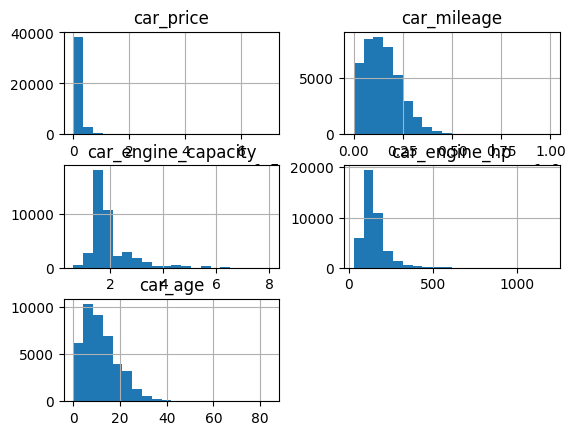

In [ ]:
df.hist(bins=20)

<Axes: >

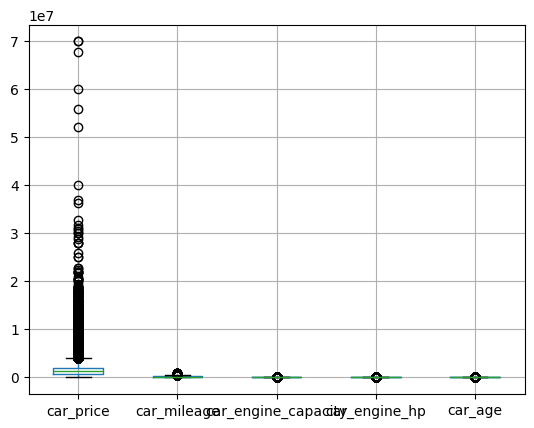

In [ ]:
df.boxplot()

# **4.Correlation Analysis**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['car_brand']=le.fit_transform(df['car_brand'])
df['car_model']=le.fit_transform(df['car_model'])
df['car_city']=le.fit_transform(df['car_city'])
df["car_fuel"]=le.fit_transform(df["car_fuel"])
df["car_transmission"]=le.fit_transform(df["car_transmission"])
df["car_drive"]=le.fit_transform(df["car_drive"])
df["car_country"]=le.fit_transform(df["car_country"])

<Axes: >

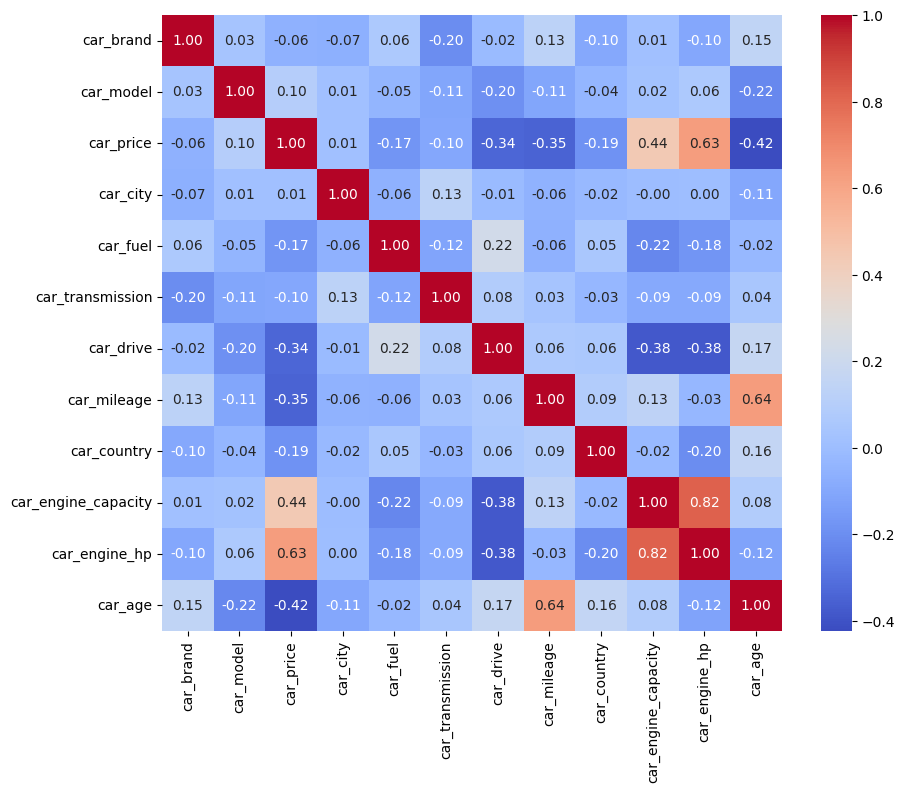

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm")

In [ ]:
#droping multicollinearity features
df.drop("car_engine_capacity",axis=1,inplace=True)

<Axes: >

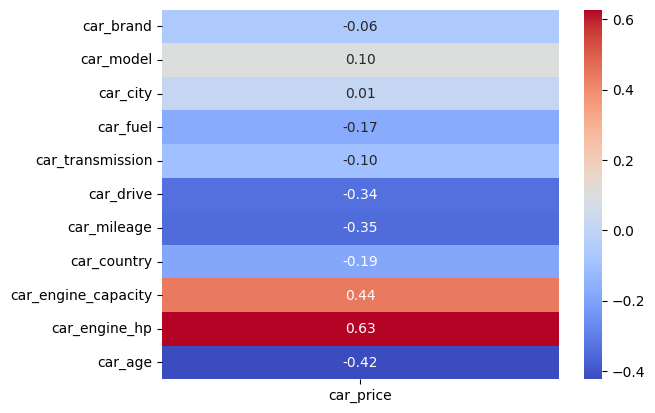

In [ ]:
corr=df.corr()["car_price"]
corr=corr.drop("car_price")
sns.heatmap(corr.to_frame(),annot=True,fmt=".2f",cmap="coolwarm")

In [ ]:
df.drop("car_brand",axis=1,inplace=True)
df.drop("car_city",axis=1,inplace=True)
df.drop("car_model",axis=1,inplace=True)
df.drop("car_transmission",axis=1,inplace=True)

# **5.Loging**

In [ ]:
df["car_fuel"]=np.log1p(df["car_fuel"])
df["car_drive"]=np.log1p(df["car_drive"])
df["car_mileage"]=np.log1p(df["car_mileage"])
df["car_country"]=np.log1p(df["car_country"])
df["car_engine_hp"]=np.log1p(df["car_engine_hp"])
df["car_age"]=np.log1p(df["car_age"])
df["car_price"]=np.log1p(df["car_price"])

# **6.outlier detection**

<Axes: >

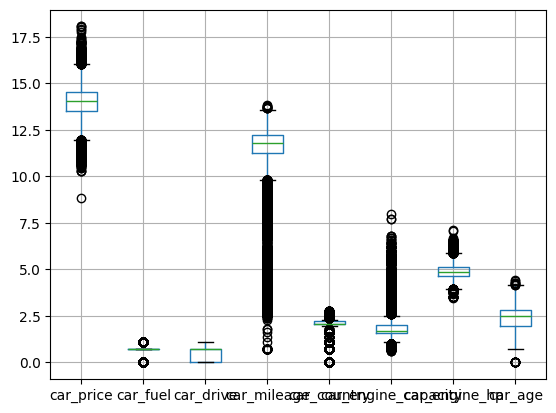

In [ ]:
df.boxplot()

In [ ]:
def outlier_removing(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue
      Q1=df[col].quantile(0.25)
      Q3=df[col].quantile(0.75)
      IQR=Q3-Q1
      Lower_bound=Q1-1.5*IQR
      Upeer_bound=Q3-1.5*IQR
      df=df[(df[col]>=Lower_bound)&(df[col]<=Upper_bound)]
    return df
df_cleaned=outlier_removing(df,exclude_column='car_price')
df=df_cleaned

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

x=df[['car_fuel',"car_drive","car_mileage","car_country","car_engine_hp","car_age"]]
y=df["car_price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2}')

MSE: 0.17999550353633326, RMSE: 0.42425876954558434, R2: 0.7656439778904733


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model2=RandomForestRegressor()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2}')

MSE: 0.0689338244945779, RMSE: 0.2625525175932958, R2: 0.9102474418529876
